In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [5]:
!mkdir -p drive
!google-drive-ocamlfuse drive

import sys
sys.path.insert(0, 'drive/python_dersleri')

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [7]:
import os
cwd = os.getcwd()
cwd

'/content'

In [0]:
os.chdir("drive/python_dersleri/")

In [9]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data_sets/flight.csv')
print(df.info())
print('')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 13 columns):
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
distance          336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 33.4+ MB
None



,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,time_hour
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,1400,2013-01-01 05:00:00
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,1416,2013-01-01 05:00:00
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,1089,2013-01-01 05:00:00
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,1576,2013-01-01 05:00:00
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,762,2013-01-01 06:00:00


**Kütüphanelerimizi ve veri setimizi yüklüyoruz. Sonrasında veri tiplerini ve eksik verimizin olup olmadığını kontrol ediyoruz.**

**time_hour değişkenimizin tipi 'object' zaman serisi analizleri için değişkenimizin tipini datetime yapıyoruz ve değişiklikleri kontrol ediyoruz.**




In [142]:
df['time_hour'] = pd.to_datetime(df['time_hour'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 13 columns):
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
distance          336776 non-null int64
time_hour         336776 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 33.4+ MB


**time_hour değişkenimizi kullanarak yıl, ay, gün, saat, dakika ve haftanın günü zenginleştirmelerini gerçekleştiriyoruz.**

In [143]:
df['date'] = df['time_hour'].map(lambda x: x.strftime('%Y-%m-%d'))
df['year'] = df['time_hour'].dt.year
df['month'] = df['time_hour'].dt.month
df['day'] = df['time_hour'].dt.day
df['hour'] = df['time_hour'].dt.hour
df['minute'] = df['time_hour'].dt.minute
df['day_of_week'] = df['time_hour'].dt.dayofweek
df.head()
#day of week 0 pazartesi 6 pazar

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,time_hour,date,year,month,day,hour,minute,day_of_week
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,1400,2013-01-01 05:00:00,2013-01-01,2013,1,1,5,0,1
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,1416,2013-01-01 05:00:00,2013-01-01,2013,1,1,5,0,1
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,1089,2013-01-01 05:00:00,2013-01-01,2013,1,1,5,0,1
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,1576,2013-01-01 05:00:00,2013-01-01,2013,1,1,5,0,1
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,762,2013-01-01 06:00:00,2013-01-01,2013,1,1,6,0,1


**Bu veri setindeki hedef değişkenimiz uçakların varışındaki gecikme süresi. Hedef değişkenimizin saatlere göre ortalamasının dağılımına bakalım.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'minutes')

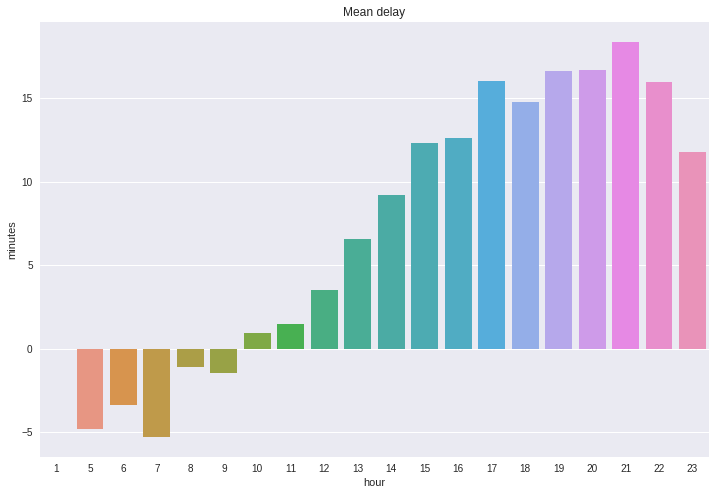

In [144]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.groupby('hour').arr_delay.mean().index, y=df.groupby('hour').arr_delay.mean().values, data=df)
ax.set_title('Mean delay')
ax.set_ylabel('minutes')

**Aynı çalışmayı haftanın günleri için de basitçe yapabiliriz.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'minutes')

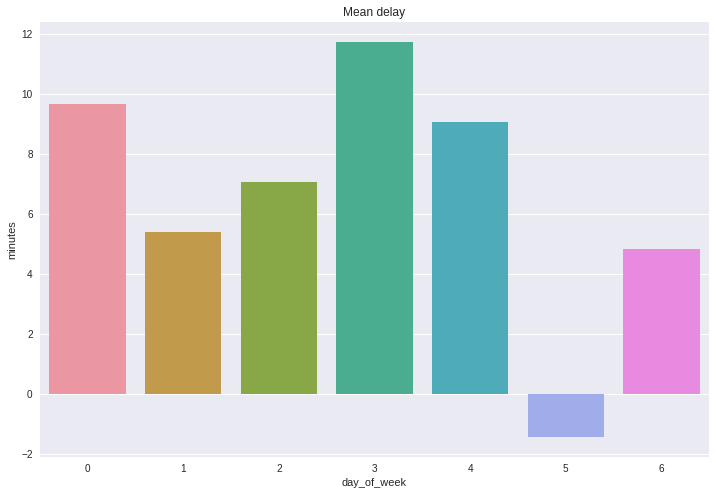

In [145]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.groupby('day_of_week').arr_delay.mean().index, y=df.groupby('day_of_week').arr_delay.mean().values, data=df)
ax.set_title('Mean delay')
ax.set_ylabel('minutes')

**Verimizi aylık, haftalık ve günlük olarak gruplandırıp özniteliklerimizin ortalamasını,  medyanını, toplamını, en küçük, en büyük değerleri kolayca bulabiliriz. Resample zaman serisi analizi için oldukça basit ve faydalı bir fonksiyon.**

In [155]:
df.resample('M', on = 'time_hour').mean()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,distance,year,month,day,hour,minute,day_of_week
time_hour,,,,,,,,,,,,,,
2013-01-31,1347.209531,1340.909532,10.036665,1523.154526,1547.597874,6.861983,1958.625426,1006.843616,2013.0,1.0,15.991261,13.157125,0.0,2.798734
2013-02-28,1347.574462,1342.478257,10.816843,1522.206593,1547.108853,6.964370,1956.268406,1000.982285,2013.0,2.0,14.743617,13.172458,0.0,2.888221
2013-03-31,1359.499768,1354.202816,13.227076,1509.742977,1546.235139,7.504196,2003.472428,1011.987099,2013.0,3.0,15.995665,13.287577,0.0,3.095027
2013-04-30,1353.269684,1351.048747,13.938038,1500.704490,1536.894140,14.132474,1978.577939,1038.732580,2013.0,4.0,15.429827,13.250053,0.0,2.740346
2013-05-31,1351.168207,1345.295215,12.986859,1502.684660,1533.465898,5.644603,1986.241040,1040.912905,2013.0,5.0,15.993020,13.186623,0.0,2.896027
2013-06-30,1350.841081,1346.389088,20.846332,1467.993670,1526.858372,20.063626,1935.192048,1057.125235,2013.0,6.0,15.598626,13.192083,0.0,3.070070
2013-07-31,1353.160892,1347.332846,21.727787,1455.943802,1520.662634,20.573560,1958.943415,1058.596398,2013.0,7.0,16.193373,13.202515,0.0,2.718029
2013-08-31,1350.237648,1344.878644,12.611040,1495.367961,1519.395608,7.112047,1960.480956,1062.138439,2013.0,8.0,15.833907,13.179561,0.0,2.996351
2013-09-30,1334.108694,1334.649271,6.722476,1503.549280,1534.127620,-2.122144,2026.244506,1041.249946,2013.0,9.0,15.601581,13.082904,0.0,2.864728


In [151]:
df.resample('W', on = 'time_hour').mean().head(10)

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,distance,year,month,day,hour,minute,day_of_week
time_hour,,,,,,,,,,,,,,
2013-01-06,1361.828009,1352.920635,9.886249,1538.998636,1551.877662,5.496322,1876.265389,1052.418506,2013.0,1.000000,3.430507,13.268099,0.0,3.430507
2013-01-13,1337.049786,1341.113019,5.246621,1514.332453,1542.772162,-1.771999,1969.401537,998.889271,2013.0,1.000000,9.884691,13.161596,0.0,2.884691
2013-01-20,1344.038494,1336.662413,7.495041,1532.439307,1546.060988,6.573914,1971.853165,999.068445,2013.0,1.000000,16.860292,13.116009,0.0,2.860292
2013-01-27,1350.085167,1338.974541,12.820763,1514.419496,1551.296909,10.824930,1972.833196,996.861795,2013.0,1.000000,23.890560,13.139858,0.0,2.890560
2013-02-03,1347.470088,1338.143658,14.125715,1527.384068,1550.428336,10.831272,1973.618506,996.248227,2013.0,1.399472,18.498103,13.131288,0.0,2.881742
2013-02-10,1339.925797,1337.967235,9.697778,1537.142028,1550.681848,10.490170,1974.265400,995.581913,2013.0,2.000000,6.884666,13.129587,0.0,2.884666
2013-02-17,1343.754128,1343.209910,10.732385,1511.422982,1546.636626,7.021328,1955.715843,1002.762668,2013.0,2.000000,13.917094,13.178480,0.0,2.917094
2013-02-24,1352.019686,1346.016142,10.934117,1513.217384,1543.789531,6.459489,1942.898919,1005.881053,2013.0,2.000000,20.906598,13.205767,0.0,2.906598
2013-03-03,1357.912830,1347.903942,11.763645,1518.962294,1546.581006,2.051366,1961.183582,1005.534761,2013.0,2.409063,16.472222,13.226102,0.0,2.925978


In [152]:
df.resample('D', on = 'time_hour').mean().head(10)

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,distance,year,month,day,hour,minute,day_of_week
time_hour,,,,,,,,,,,,,,
2013-01-01,1384.991647,1372.363420,11.548926,1562.344086,1567.661520,12.985748,1821.496437,1077.429929,2013.0,1.0,1.0,13.465558,0.0,1.0
2013-01-02,1353.960428,1340.580064,13.858824,1532.729904,1539.181336,12.628844,1917.732768,1053.117709,2013.0,1.0,2.0,13.147402,0.0,2.0
2013-01-03,1356.665929,1344.485777,10.987832,1536.290929,1542.631291,5.483589,1913.176149,1037.370897,2013.0,1.0,3.0,13.178337,0.0,3.0
2013-01-04,1347.856986,1341.010929,8.951595,1519.116612,1541.072131,-2.019672,1930.147541,1032.475410,2013.0,1.0,4.0,13.148634,0.0,4.0
2013-01-05,1326.089261,1326.008333,5.732218,1509.136681,1524.498611,-1.540278,1740.019444,1067.591667,2013.0,1.0,5.0,12.997222,0.0,5.0
2013-01-06,1399.055355,1392.884615,7.148014,1572.981949,1596.028846,4.201923,1902.792067,1051.646635,2013.0,1.0,6.0,13.669471,0.0,6.0
2013-01-07,1340.619355,1336.782422,5.417204,1516.179570,1538.613076,-4.838156,1993.561629,998.257235,2013.0,1.0,7.0,13.116827,0.0,0.0
2013-01-08,1334.985475,1334.395996,2.553073,1533.889385,1535.793103,-3.368187,2008.276974,985.532814,2013.0,1.0,8.0,13.096774,0.0,1.0
2013-01-09,1326.494983,1334.567627,2.276477,1522.873743,1538.498891,-0.208426,2017.395787,981.420177,2013.0,1.0,9.0,13.101996,0.0,2.0


**Gecikme sürelerinin aylık, haftalık ve günlük ortalamalarını hesapladık artık basitçe görselleştirebiliriz.**


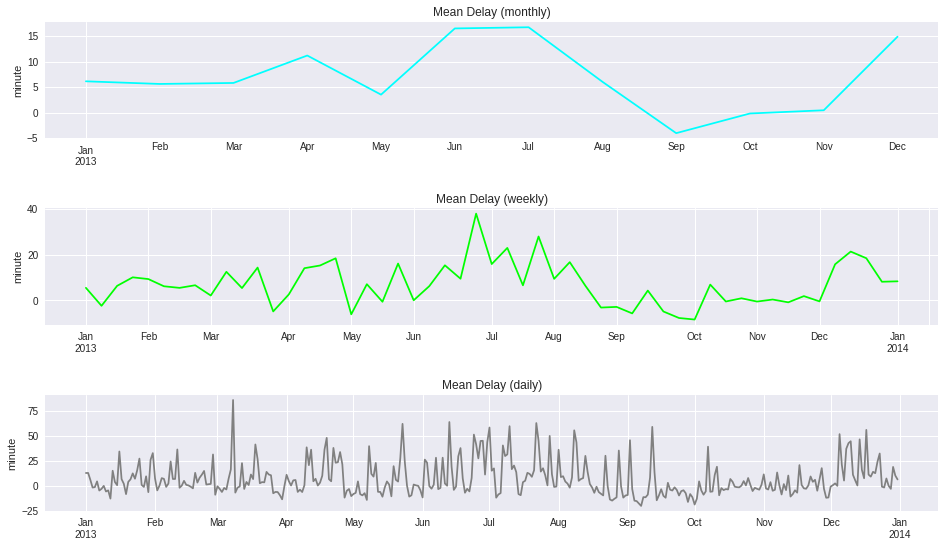

In [149]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(3,1,figsize=(16,9))

df1 = df.resample('M', on='time_hour').mean()
df2 = df.resample('W', on='time_hour').mean()
df3 = df.resample('D', on='time_hour').mean()

df1['arr_delay'].plot(ax = ax[0], color = 'cyan')
ax[0].set_title('Mean Delay (monthly)')
ax[0].set_xlabel('')
ax[0].set_ylabel('minute')

df2['arr_delay'].plot(ax = ax[1], color = 'lime')
ax[1].set_title('Mean Delay (weekly)')
ax[1].set_xlabel('')
ax[1].set_ylabel('minute')

df3['arr_delay'].plot(ax = ax[2], color = 'grey')
ax[2].set_title('Mean Delay (daily)')
ax[2].set_xlabel('')
ax[2].set_ylabel('minute')
    
f.subplots_adjust(hspace=0.6)
plt.show()

**Gecikme süresinin son 6 değeri eksik, eksik değerleri 'forward-fill' metoduyla doldurabiliriz.**

In [157]:
print('before')
print('')
print(df.arr_delay.tail(10))
print('')
print('after')
print('')
df.arr_delay = df.arr_delay.fillna(method='ffill')
df.arr_delay.tail(10)

before

336766   -20.0
336767   -16.0
336768     1.0
336769   -25.0
336770   -25.0
336771   -25.0
336772   -25.0
336773   -25.0
336774   -25.0
336775   -25.0
Name: arr_delay, dtype: float64

after



336766   -20.0
336767   -16.0
336768     1.0
336769   -25.0
336770   -25.0
336771   -25.0
336772   -25.0
336773   -25.0
336774   -25.0
336775   -25.0
Name: arr_delay, dtype: float64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
distance          336776 non-null int64
time_hour         336776 non-null datetime64[ns]
date              336776 non-null object
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
day_of_week       336776 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(10), object(5)
memory 